# MNIST Handwritten Digit Recognizer

## MNIST Dataset Overview
### The MNIST dataset is a widely recognized and frequently used dataset in the machine learning community, especially for image classification tasks. It contains 70,000 grayscale images of handwritten digits, each measuring 28x28 pixels and representing a single digit from 0 to 9. The dataset is split into two sets: a training set with 60,000 images and a test set of 10,000 images. Originally created by NIST (National Institute of Standards and Technology), it has become a standard benchmark for evaluating machine learning models in research and academic environments.

## Applications and Importance
### The MNIST dataset is ideal for testing machine learning models designed for image classification, specifically for tasks involving handwritten digits. Training a model on this dataset enables the development of systems capable of recognizing handwritten digits from images. This has practical applications such as:

### Automating the transcription of handwritten documents.
### Developing systems to identify digits in financial documents.
### Moreover, the relatively small size of the images in MNIST (28x28 pixels) makes it easy to train and evaluate models efficiently. As a result, the dataset serves as a valuable resource for both researchers and practitioners working on image classification problems.

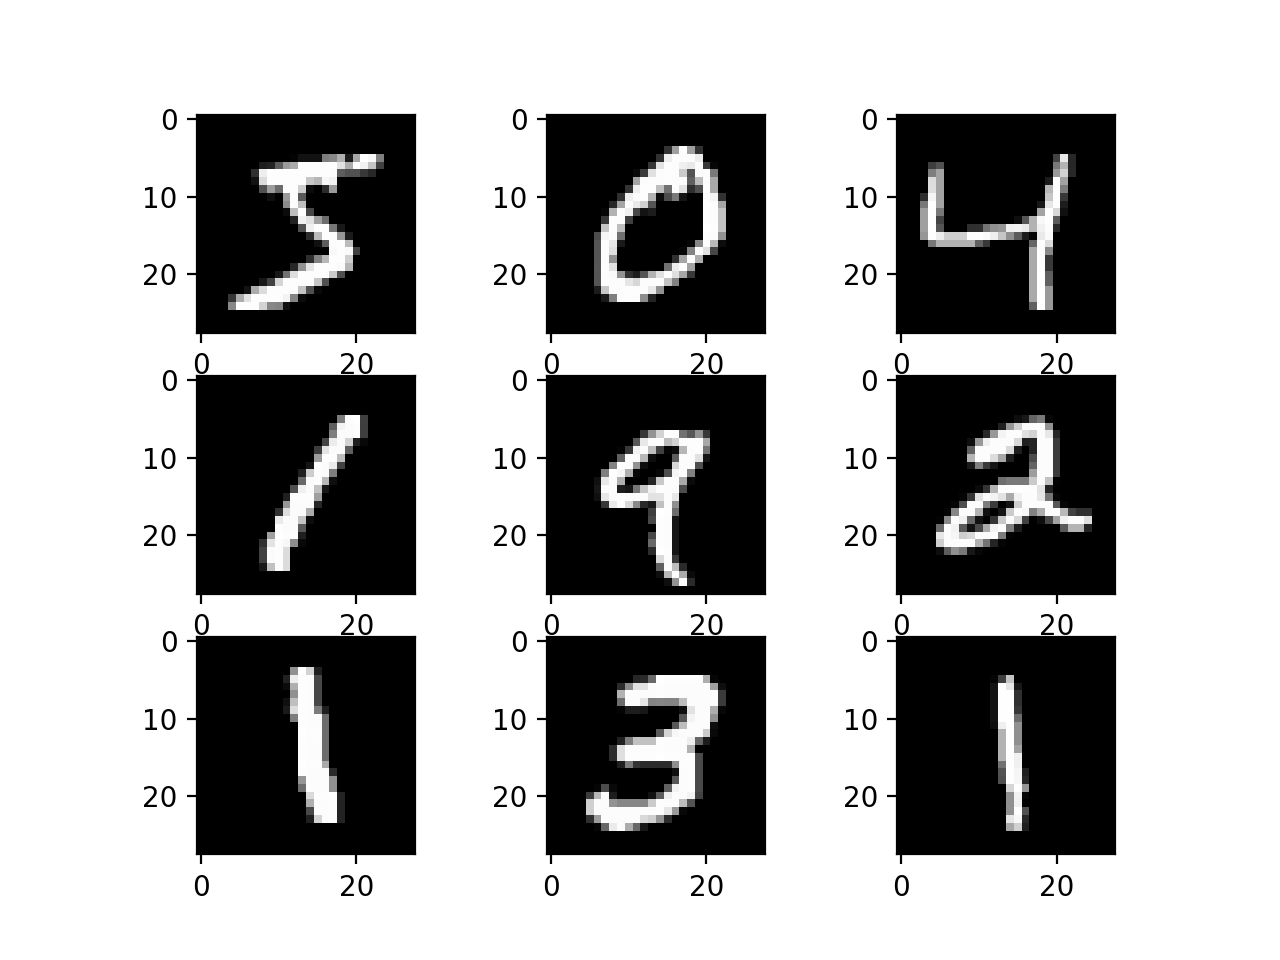

## This project is divided into three main parts:

### 1. Working with Images in Python: We will explore how grayscale and RGB images are represented, understanding the use of 1 channel for grayscale and 3 channels for RGB images. We will use NumPy for image processing and Matplotlib for visualization.

### 2. Feature Engineering: We will apply data augmentation techniques to create new image features, enhancing model robustness against unseen data. ImageDataGenerator from Keras will be used for augmentation.

### 3. Model Prediction and Evaluation: A basic KNN classifier will be trained on the augmented data and evaluated on the test set to assess performance.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train  = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test   = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [29]:
number = np.array(train.iloc[0,1:]).reshape(28,28)
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0])

In [6]:
import matplotlib.pyplot as plt

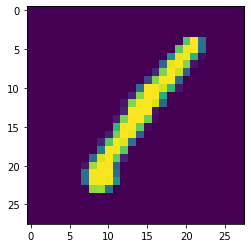

In [7]:
plt.imshow(number)

In [8]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)

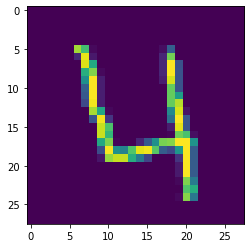

In [9]:
plt.imshow(number4)

In [10]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

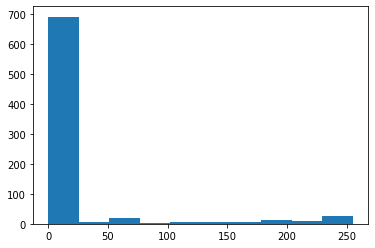

In [11]:
plt.hist(arr)

In [12]:
max(arr)


255

In [13]:
min(arr)

0

In [14]:
np.mean(arr)

19.164540816326532

## Missing Values


In [15]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [16]:
x = np.array(train)
y = np.array(test)

In [17]:
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

## Feature Engineering

In [18]:
from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)


In [19]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
    )
datagen.fit(X_train)

In [20]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [30]:
int(knn.predict(X_test[60].reshape(1,-1)))

4

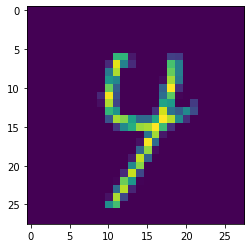

In [31]:
num = np.array(test.iloc[60,:]).reshape(28,28)
plt.imshow(num)